# Finch Carr Homework 3
## *Problem 1*
- I want to compare two truth tables that compare the categorizations of photos by two different Neural Networks against a person
### Problem 1A)
- I want to know which algorithm between the two tables has made the fewest errors.
  - The first table, TableA, sorted 3 birds as people and 5 people as birds
    - This is a total of 8 mistakes by the first neural network, AlgorithmA
  - The second table, TableB, sorted 1 bird as a person, and 11 people as birds
    - This is a total of 12 mistakes by the second neural network, AlgorithmB
- **Answer**: AlgorithmA made the fewest total mistakes
### Problem 1B)
- Since the two possible misidentification routes are weighted in terms of importance in an unequal manner, I can say that the misidentification of a true bird as a categorized person by any algorithm is the key mistake to analyze to determine which algorithm is better for the zoo
  - AlgorithmA incorrectly identified 5/48 birds as people that it would hypothetically allow to leave freely from the bird exhibit
  - AlgorithmB incorrectly identified 11/48 birds as people that it would hypothetically allow to leave freely from the bird exhibit
- **ANSWER**: AlgorithmA is the best for the zoo because it is more accurate at identifying birds correcctly, with a lower identification error of 5/48
### Problem 1C)
- During the pandemic, only the zookeeper visits the bird exhibit so there is a total of 48 birds and 1 person in the exhibit
- I want to make new truth tables for each of the two algorithms

In [2]:
# Finch's Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import random
%matplotlib inline

In [3]:
# Recreating the NN Table with a 5/52 chance of misidentifying the zookeeper as a bird
NN = {'True Bird': [45, 3],
      'True Person': [0, 1]}
NNframe = pd.DataFrame(NN, columns=['True Bird', 'True Person'], index=['NN Bird', 'NN Person'])

# Recreating the NA Table with a 11/52 chance of misidentifying the zookeeper as a bird
NA = {'True Bird': [47, 1],
      'True Person': [0, 1]}
NAframe = pd.DataFrame(NA, columns=['True Bird', 'True Person'], index=['NA Bird', 'NA Person'])
NNframe

,True Bird,True Person
NN Bird,45,0
NN Person,3,1


In [4]:
NAframe

,True Bird,True Person
NA Bird,47,0
NA Person,1,1


- Above are the new tables for the NN and NA algorithms for the pandemic period, where both have respective probabilities applied to the zookeeper's identification
  - AlgorithmA has a 9% chance of classifying the zookeeper as a bird, while AlgorithmB has a 21% chance of doing so. 
## *Problem 2*
### Problem 2A)
- I want to know what form a distribution takes if it the sum of two exponential distributions
  - From my research I find that if I sum (through convolution) a standard exponential PDF (I've defined the exponential function as $E(x) = e^{-x}$) with itself, the resulting PDF is defined below:
    - The PDF convolution of an exponential distribution takes the form of $E_{pdf}(x, \lambda) = \lambda e^{-\lambda x}$ when those PDFs have equal rates of decay (defined as $\lambda = 1/$mean), therefore having equal mean values as well
      - For my PDFs, lambda and mean are both equal to 1
    - The convolution of the two PDFs results in the summed PDF: $E2_{pdf}(z, \lambda) = \lambda^2 z e^{-\lambda z}$ where z is an input measurement for the summed PDF to use to output a probability value
      - **For my values, the PDF takes the form of $E2_{pdf}(z) = z e^{-z}$**
- This PDF is equivalent to an Erlang PDF with shape parameter $k=2$ and scale parameter $\lambda$ where $\lambda$ is equivalent to the $\lambda$ of 1 from my single exponential PDF
  - $k$ is a variable in an Erlang distribution PDF (I've defined as $Er_{pdf}(x, \lambda, k) = \frac{\lambda^k x^{k-1} e^{-\lambda x}}{(k-1)!}$
    - For a sum of Exponential PDFs, $k$ is the integer number of exponential distribution PDFs $E(x)_k$ being summed, so in this case $k=$**(Number of PDFs summed)**$ = 2$ because we convolve a total of 2 PDFs for a sum consisting of 2 distributions
  - **For my specific comparison, the Erland PDF takes the form of $Er_{pdf} = {xe^{-x}}$**
  - If $k$ was not an integer value, the resulting pdf would still resemble a Gamma distribution's PDF; my sum takes the form of a special case of the Gamma distribution called an Erlang distribution because $k$ is equal to an integer

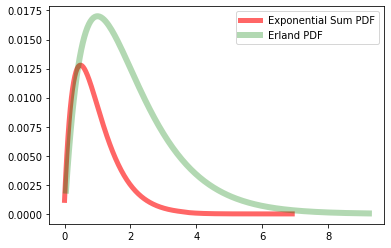

In [16]:
fig, ax = plt.subplots(1,1)
#plt.yscale('log')

# Setting up and plotting the Convolution Sum of 2 Exponential PDFs 
# (PDF must sum to 1)

meanE, varE, skewE, kurtE = stats.expon.stats(moments='mvsk')
lambdaE = 1/meanE
dataEX = np.linspace(stats.expon.ppf(0.001), stats.expon.ppf(0.999), 200)
exponA = stats.expon.pdf(dataEX, loc=0, scale=1)
E2pdf = np.convolve(exponA, exponA)
Enorm = E2pdf / sum(E2pdf)
x = np.linspace(stats.expon.ppf(0.001, 0, 1), 
                 stats.expon.ppf(0.999, 0, 1), 399, endpoint=True)
ax.plot(x, Enorm, 'r-', lw=5, alpha=0.6, label='Exponential Sum PDF')


# Setting up and plotting the researched Erlang Distribution with the correct 
# parameters (PDF must sum to 1)
k = 2
lamER = 1
eloc = 0
ERsc = 1/lamER
meanER, varER, skewER, kurtER = stats.erlang.stats(a=k, 
                                                   loc=eloc, scale=ERsc, 
                                                   moments='mvsk')
dataER = np.linspace(stats.erlang.ppf(0.001, a=k, loc=eloc, scale=ERsc), 
                  stats.erlang.ppf(0.999, a=k, loc=eloc, scale=ERsc), 200)
ErPDF = stats.erlang.pdf(dataER, a=k, loc=eloc, scale=ERsc)/sum(stats.erlang.pdf(dataER, a=k, loc=eloc, scale=ERsc))
ax.plot(dataER, ErPDF, 'g-', lw=6, alpha=0.3, label='Erland PDF')
ax.legend(loc='best')
plt.show()

In [17]:
np.mean(E2pdf), meanER, lambdaE, sum(Enorm), sum(ErPDF)

(2.145386542869013, array(2.), 1.0, 1.0000000000000016, 1.0000000000000004)

In [15]:
vals = stats.expon.ppf([0.001, 0.25, 0.50, 0.75, 0.999])
valsG = stats.erlang.ppf([0.001, 0.25, 0.50, 0.75, 0.999], a=2)
np.allclose(stats.expon.cdf(vals), stats.erlang.cdf(valsG, a=2))

True

- I see that my two distributions are equivalent because testing to see if the CDF outputs of the exponential and gamma distributions are equivalent returned an output of "**True**", reinforcing what the graph above shows when it plots two distribution functions that are completely independent of one another
### Problem 2B)
- I want to find the shape of the pdf of the ratio of two zero-mean unity variance gaussian PDFs
  - This ratio takes the form of $X_1 / X_2$ where both distributions are the standard normal distributions that have the following properties:
    - $\mu =$ mean$ = 0$ and $\sigma^2 = $variance$ = 1$
- My research says that a ratio of two independent normal distributions takes the form of a Cauchy distribution
  - I can define the Caucy PDF distribution as $C_{pdf}(x, \mu, \gamma) ={1 \over \pi \gamma }\left[{\gamma ^{2} \over (x-\mu)^{2}+\gamma ^{2}}\right]$
  - I recognize that $\mu$ works the same as $\mu$ in a normal distribution as a location parameter and that the $\gamma$ variable is equivalent to the scale parameter of a normal distribution

NameError: name 'xC' is not defined

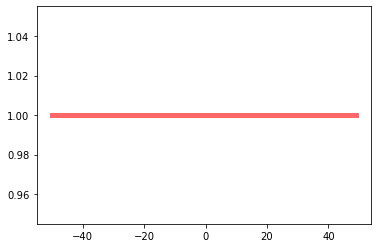

In [74]:
# Setting up and plotting the Ratio of 2 Normal PDFs
fig, ax = plt.subplots(1,1)
meanN, varN, skewN, kurtN = stats.norm.stats(moments='mvsk')
N = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
normPDF = stats.norm.pdf(N)
Nratio = normPDF / normPDF
ax.plot(np.arange(-50,50), Nratio, 'r-', lw=5, alpha=0.6, 
        label='$X_1 / X_2$')

# Setting up and plotting the researched Cauchy PDF
meanC, varC, skewC, kurtC = stats.cauchy.stats(alpha, moments='mvsk')
xC = np.linspace(stats.cauchy.ppf(0.01), stats.cauchy.ppf(0.99), 100)
cauchy = stats.cauchy.pdf(xC)
Csum = np.convolve(cauchy, gamma, mode='full')
ax.plot(np.arange(1,200), Gsum, 'g-', lw=10, alpha=0.3, 
       label='Researched Result of Sum of 2 Exponential PDFs')
plt.show()

In [47]:
x.max()**2, Esum.max()

(49.3858362825524, 49.73853568086258)